# Problem Statement : Capital Bike Sharing

With environmental issues and health becoming trending topics, usage of bicycles as a mode of transportation has gained traction in recent years. To encourage bike usage, cities across the world have successfully rolled out bike sharing programs. Under such schemes, riders can rent bicycles using manual/automated kiosks spread across the city for defined periods. In most cases, riders can pick up bikes from one location and return them to any other designated place.

The bike sharing platforms from across the world are hotspots of all sorts of data, ranging from travel
time, start and end location, demographics of riders, and so on. This data along with alternate sources
of information such as weather, traffic, terrain, and so on makes it an attractive proposition for different
research areas.

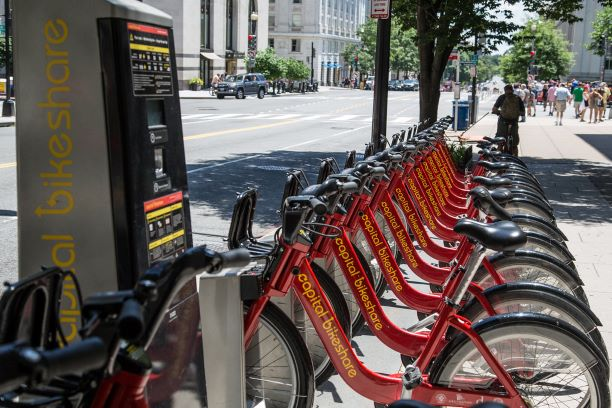

The **Capital Bike Sharing** dataset contains information related to one such bike sharing program underway in **Washington DC**. Explore this augmented (bike sharing details along with weather information) dataset insearch of some common trends. 


Can we forecast bike rental demand for this program?

# Exploratory Data Analysis

Now that we have an overview of the business case and a formal problem statement, the very next stage is to
explore and understand the data. This is also called the Exploratory Data Analysis (EDA) step. In this section, we will load the data into our analysis environment and explore its properties. It is worth mentioning again that EDA is one of the most important phases in the whole workflow and can help with not just understanding the dataset, but also in presenting certain fine points that can be useful in the coming steps.

## Preprocessing

The EDA process begins with loading the data into the environment, getting a quick look at it along with
count of records and number of attributes. We will be making heavy use of pandas and numpy to perform data
manipulation and related tasks. For visualization purposes, we will use matplotlib and seaborn along with
pandas' visualization capabilities wherever possible.

We begin with loading the `hour.csv` and checking the shape of the loaded dataframe.

In [1]:
##to check current working directory
# import os
# os. getcwd()

In [2]:
import pandas as pd

hour_df = pd.read_csv("hour.csv")
print(hour_df.shape)

(17379, 17)


The dataset contains more than **17k records with 17 attributes (variables)**. Let’s check the top few rows to see how
the data looks

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The data seems to have loaded correctly. Next, we need to check what data types pandas has inferred
and if any of the attributes require type conversions.

In [4]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

As mentioned in the documentation for the dataset, there are bike sharing as well as weather attributes
available. The attribute `dteday` would require type conversion from object (or string type) to timestamp.
Attributes like `season`, `holiday`, `weekday`, and so on are inferred as integers by pandas, and they would
require conversion to categoricals for proper understanding.

**NOTE :** For Documentation look for file `Attribute information.txt` in Bike Sharing Dataset folder. 


Before jumping into **type casting attributes**, lets rename attribute names to make them more understandable and pythonic.

In [5]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'}, inplace = True)

In [6]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
#checking- if there is any null value or not
hour_df.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Now that we have attribute names cleaned up, we perform **type-casting** of attributes using utilities like
`pd.to_datetime()` and `astype()`.

**For reference :** 
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

In [8]:
# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

In [9]:
#checking
hour_df.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
hour                       category
is_holiday                 category
weekday                    category
is_workingday              category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

## Data Distribution and Pattern

The dataset after preprocessing (which we performed in the previous step) is ready for some visual
inspection. We begin with visualizing hourly ridership counts across the seasons.

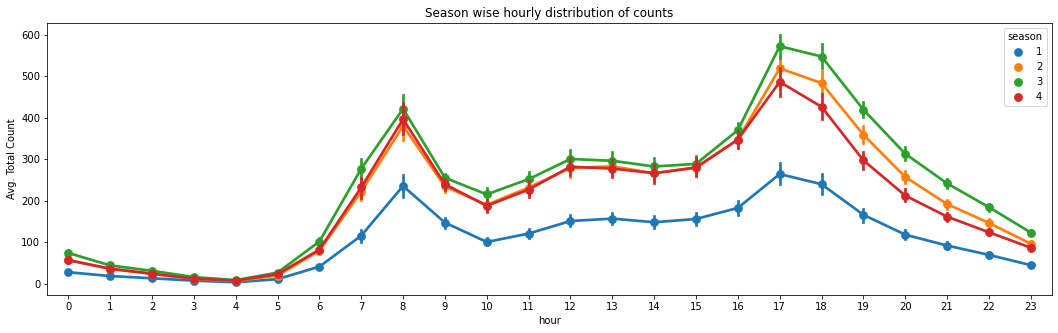

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.pointplot(data=hour_df[['hour','total_count','season']],
             x='hour',y='total_count',
             hue='season')

plt.ylabel("Avg. Total Count")
plt.title("Season wise hourly distribution of counts")
plt.show()

In [11]:
df = hour_df[(hour_df['hour'] == 9) & (hour_df['season'] == 1)]
df['total_count'].mean()

147.0167597765363

The plot shows similar trends for all seasons with counts peaking in the morning between 7-9 am and in the evening between 4-6 pm, possibly due to high movement during start and end of office hours. The counts are lowest for the spring season, while fall sees highest riders across all 24 hours.

**For reference :** https://seaborn.pydata.org/generated/seaborn.pointplot.html

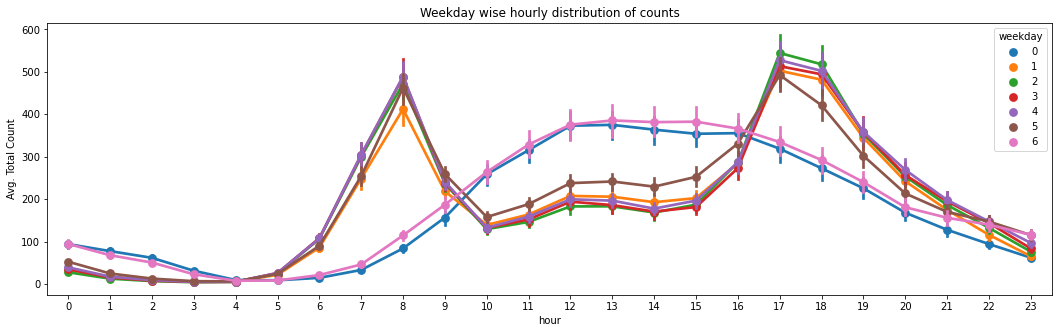

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.pointplot(data=hour_df[['hour','total_count','weekday']],
             x='hour',y='total_count',
             hue='weekday')

plt.ylabel("Avg. Total Count")
plt.title("Weekday wise hourly distribution of counts")
plt.show()

Distribution of ridership across distribution of ridership across days of the week also presents interesting trends of higher usage during afternoon hours over weekends, while weekdays see higher usage during mornings and evenings.

Having observed hourly distribution of data across different categoricals, let’s visualize monthly ridership trends.

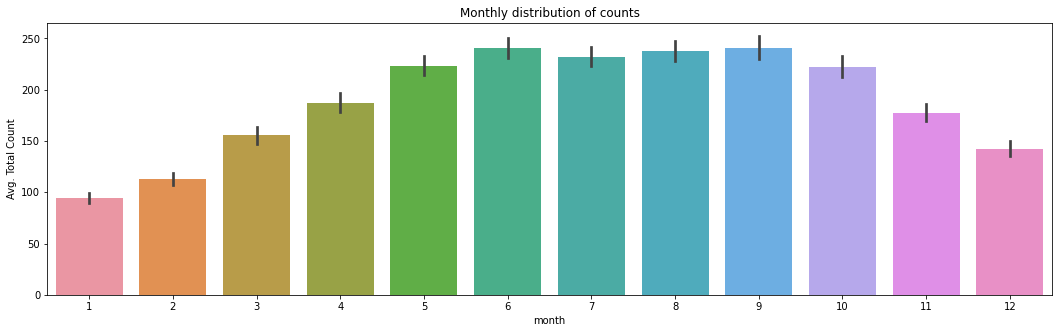

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(18,5))

sns.barplot(data=hour_df[['month','total_count']],
             x='month',y='total_count')

plt.ylabel("Avg. Total Count")
plt.title("Monthly distribution of counts")
plt.show()

Lets try and plot the ridership trend for four seasons.

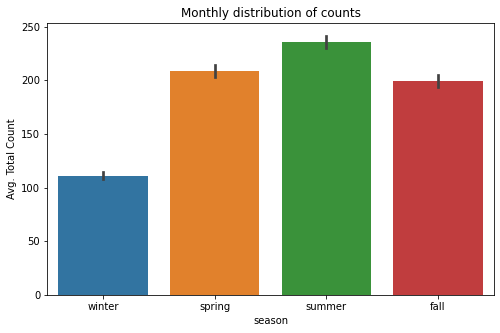

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.barplot(data=hour_df[['season','total_count']],
             x='season',y='total_count')

plt.ylabel("Avg. Total Count")
plt.xticks([0,1,2,3],['winter','spring','summer','fall'])
plt.title("Monthly distribution of counts")
plt.show()

Lets see how whether a working day or non-working day affects bike sharing.

<Figure size 576x360 with 0 Axes>

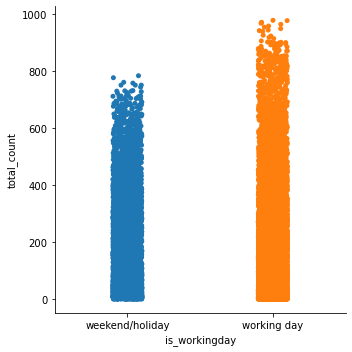

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.catplot(x="is_workingday", y="total_count",data = hour_df[['is_workingday','total_count']])
plt.xticks([0,1],['weekend/holiday','working day'])
plt.show()

NOTE : `is_workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.


**For reference**: https://seaborn.pydata.org/generated/seaborn.catplot.html

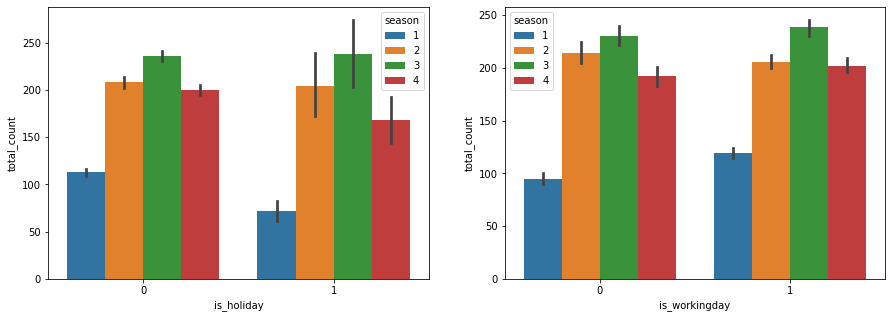

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols = 2,figsize=(15,5))

sns.barplot(data=hour_df,x='is_holiday',y = 'total_count',hue = 'season',ax = ax1)
sns.barplot(data=hour_df,x='is_workingday',y = 'total_count',hue = 'season',ax = ax2)
plt.show()

Let’s look at the distribution at year level. Our dataset contains year value of 0 representing 2011 and 1 representing 2012. We use a violin plot to the distribution for these two years.

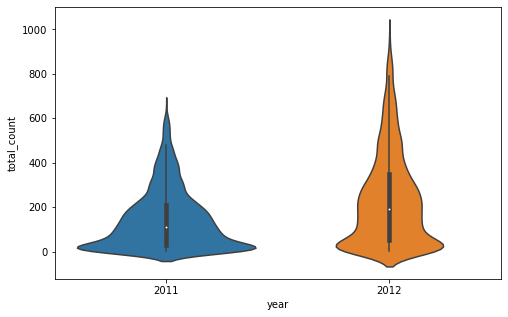

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(8,5))

sns.violinplot(data=hour_df[['year','total_count']], x="year", y="total_count")

plt.xticks([0, 1], ['2011','2012'])
plt.show()

The spread of counts is much more for 2012, although the max density for both the years is between 100-200 rides.

**For reference:** https://seaborn.pydata.org/generated/seaborn.violinplot.html 

## Outliers

While exploring and learning about any dataset, it is imperative that we check for extreme and unlikely values. Though we handle missing and incorrect information while preprocessing the dataset, outliers are usually caught during EDA. Outliers can severely and adversely impact the downstream steps like modeling and the results.

We usually utilize boxplots to check for outliers in the data.

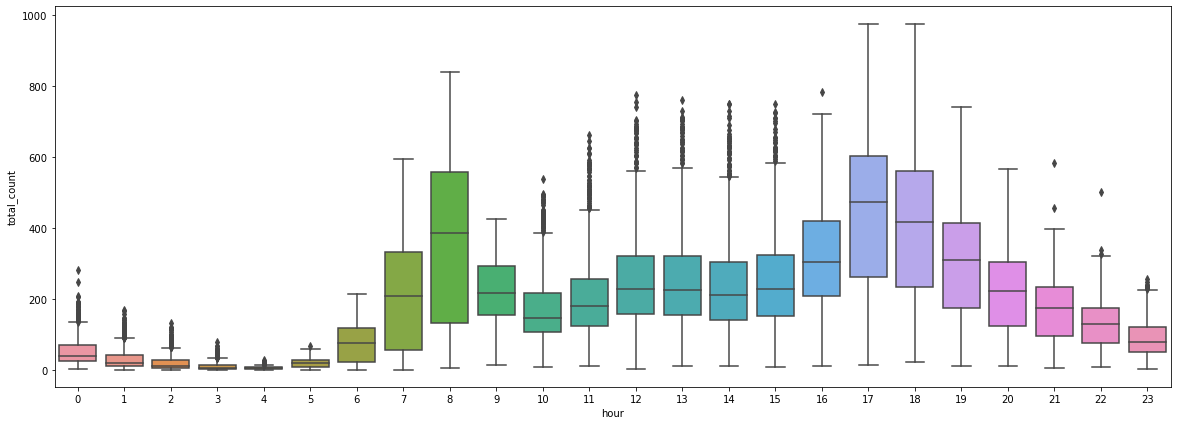

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig= plt.figure(figsize=(20,7))
sns.boxplot(data=hour_df[['hour','total_count']], x="hour", y="total_count")

plt.show()

## Correlations

Correlation helps us understand relationships between different attributes of the data.

<ipython-input-19-7889f968e024>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


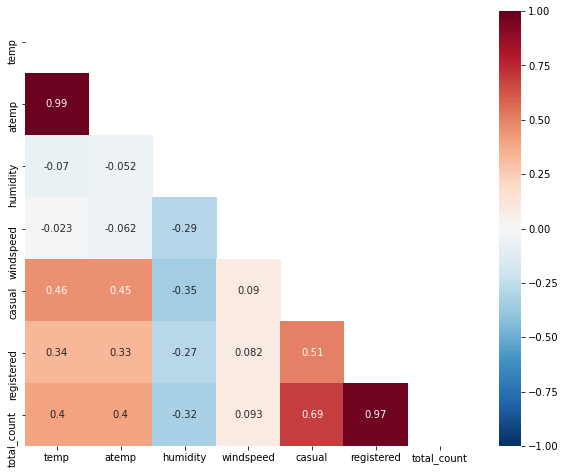

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

#Plotting a diagonal correlation matrix

correlation = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
plt.figure(figsize=(10, 8)) # set figure size

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
# print(mask)

sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, vmax = +1, cmap="RdBu_r",mask=mask)
plt.show()

- The two count variables, `registered` and `casual`, show obvious strong correlation to `total_count`. 

- Similarly, `temp` and `atemp` show high correlation. 

- `wind_speed` and `humidity` have slight negative correlation. 

- Overall, none of the attributes show high correlational statistics.